# 01 - Data Exploration and Analysis (EDA)

Contents:
- Data Loading and Initial Inspections
- Missing Values and Data Quality Assessment
- Distrubution Analysis
- Feature Relationships and Correlations

## Set up and Data Loading

In [10]:
%load_ext autoreload
%autoreload 2

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime
import os
import sys

# Import the custom scripts
sys.path.append('../scripts')
import misc

In [4]:
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# Define project paths
ROOT = Path.cwd().parent if (Path.cwd().parent / 'data').exists() else Path.cwd()

# Set the paths for relevant data
DATA_RAW = os.path.join(ROOT, "data", "raw")
DATA_PROC = os.path.join(ROOT, "data", "processed")
FIGS = os.path.join(ROOT, "reports", "figures")

# Create output directories 
for path in [DATA_PROC, FIGS]:d
    # p.mkdir(parents=True, exist_ok=True)
    os.makedirs(path, exist_ok=True)

print(f'Project Root: {ROOT}')
print(f'Raw Data: {DATA_RAW}')
print(f'Processed Data: {DATA_PROC}')
print(f'Figures: {FIGS}')

Project Root: /home/row/Desktop/projects/MLOps-Phase2
Raw Data: /home/row/Desktop/projects/MLOps-Phase2/data/raw
Processed Data: /home/row/Desktop/projects/MLOps-Phase2/data/processed
Figures: /home/row/Desktop/projects/MLOps-Phase2/reports/figures


In [39]:
# Load datset
dataset_path = os.path.join(DATA_RAW, 'student_entry_performance_original.csv')
df = pd.read_csv(dataset_path)

In [56]:
# Call the function that describes dataframe
misc.describe_dataframe(df)

Dataset Shape: (666, 12)
Number of Rows: 666
Number of Columns: 12
Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Performance           666 non-null    object
 1   Gender                666 non-null    object
 2   Caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   Class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   Class_ X_Percentage   666 non-null    object
 9   Class_XII_Percentage  666 non-null    object
 10  Father_occupation     666 non-null    object
 11  Mother_occupation     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


None

,COLUMNS,VALUE
0,Performance,Excellent
1,Gender,male
2,Caste,General
3,coaching,NO
4,time,ONE
5,Class_ten_education,SEBA
6,twelve_education,AHSEC
7,medium,ENGLISH
8,Class_ X_Percentage,Excellent
9,Class_XII_Percentage,Excellent


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,4,2,4,3,6,3,3,3,4,4,8,9
top,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
freq,210,355,329,449,368,396,368,536,511,398,277,442


## Data Quality Assessment

In [8]:
# Fix column names (remove extra spaces)
df.columns = df.columns.str.strip().str.replace(' ', '')
print(f'\nFixed Column Names:\n{df.columns.tolist()}')


Fixed Column Names:
['Performance', 'Gender', 'Caste', 'coaching', 'time', 'Class_ten_education', 'twelve_education', 'medium', 'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation']


In [9]:
# Missing Values
print("="*80)
print("MISSING VALUE ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

print(missing_df)
print(f'\nTotal missing values: {missing.sum()}')

MISSING VALUE ANALYSIS
                      Missing_Count  Percentage
Performance                       0         0.0
Gender                            0         0.0
Caste                             0         0.0
coaching                          0         0.0
time                              0         0.0
Class_ten_education               0         0.0
twelve_education                  0         0.0
medium                            0         0.0
Class_X_Percentage                0         0.0
Class_XII_Percentage              0         0.0
Father_occupation                 0         0.0
Mother_occupation                 0         0.0

Total missing values: 0


In [10]:
# Checking for duplicates
print(f'\nNumber of duplicate rows: {df.duplicated().sum()}')
print(f'\nPercentage of duplicate rows: {(df.duplicated().sum() / len(df)) * 100:.2f}%')


Number of duplicate rows: 44

Percentage of duplicate rows: 6.61%


In [11]:
# Unique values per column
print("="*80)
print("UNIQUE VALUES PER COLUMN")
print("="*80)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique()[:10]}")  # Show first 10

UNIQUE VALUES PER COLUMN

Performance:
  Unique values: 4
  Values: ['Excellent' 'Vg' 'Good' 'Average']

Gender:
  Unique values: 2
  Values: ['male' 'female']

Caste:
  Unique values: 4
  Values: ['General' 'OBC' 'SC' 'ST']

coaching:
  Unique values: 3
  Values: ['NO' 'WA' 'OA']

time:
  Unique values: 6
  Values: ['ONE' 'TWO' 'THREE' 'FOUR' 'FIVE' 'SEVEN']

Class_ten_education:
  Unique values: 3
  Values: ['SEBA' 'OTHERS' 'CBSE']

twelve_education:
  Unique values: 3
  Values: ['AHSEC' 'CBSE' 'OTHERS']

medium:
  Unique values: 3
  Values: ['ENGLISH' 'OTHERS' 'ASSAMESE']

Class_X_Percentage:
  Unique values: 4
  Values: ['Excellent' 'Vg' 'Good' 'Average']

Class_XII_Percentage:
  Unique values: 4
  Values: ['Excellent' 'Vg' 'Good' 'Average']

Father_occupation:
  Unique values: 8
  Values: ['DOCTOR' 'SCHOOL_TEACHER' 'BUSINESS' 'COLLEGE_TEACHER' 'OTHERS'
 'BANK_OFFICIAL' 'ENGINEER' 'CULTIVATOR']

Mother_occupation:
  Unique values: 9
  Values: ['OTHERS' 'HOUSE_WIFE' 'SCHOOL_TEACHER'

In [12]:
# Value counts for each categorical column
print("="*80)
print("VALUE COUNTS FOR EACH COLUMN")
print("="*80)

for col in df.columns:
    print(f"\n{'='*80}")
    print(f"{col.upper()}")
    print(f"{'='*80}")
    print(df[col].value_counts())
    print()

VALUE COUNTS FOR EACH COLUMN

PERFORMANCE
Performance
Good         210
Vg           198
Average      157
Excellent    101
Name: count, dtype: int64


GENDER
Gender
male      355
female    311
Name: count, dtype: int64


CASTE
Caste
General    329
OBC        162
ST         108
SC          67
Name: count, dtype: int64


COACHING
coaching
WA    449
NO    150
OA     67
Name: count, dtype: int64


TIME
time
TWO      368
ONE      199
THREE     86
FOUR      11
FIVE       1
SEVEN      1
Name: count, dtype: int64


CLASS_TEN_EDUCATION
Class_ten_education
SEBA      396
CBSE      249
OTHERS     21
Name: count, dtype: int64


TWELVE_EDUCATION
twelve_education
AHSEC     368
CBSE      290
OTHERS      8
Name: count, dtype: int64


MEDIUM
medium
ENGLISH     536
OTHERS       74
ASSAMESE     56
Name: count, dtype: int64


CLASS_X_PERCENTAGE
Class_X_Percentage
Excellent    511
Vg           101
Good          41
Average       13
Name: count, dtype: int64


CLASS_XII_PERCENTAGE
Class_XII_Percentage
Excellen

## Distribution Analysis


Saved figure to: /Users/lia/Desktop/Fase1/reports/figures/categorical_distributions_20251023_100354.png


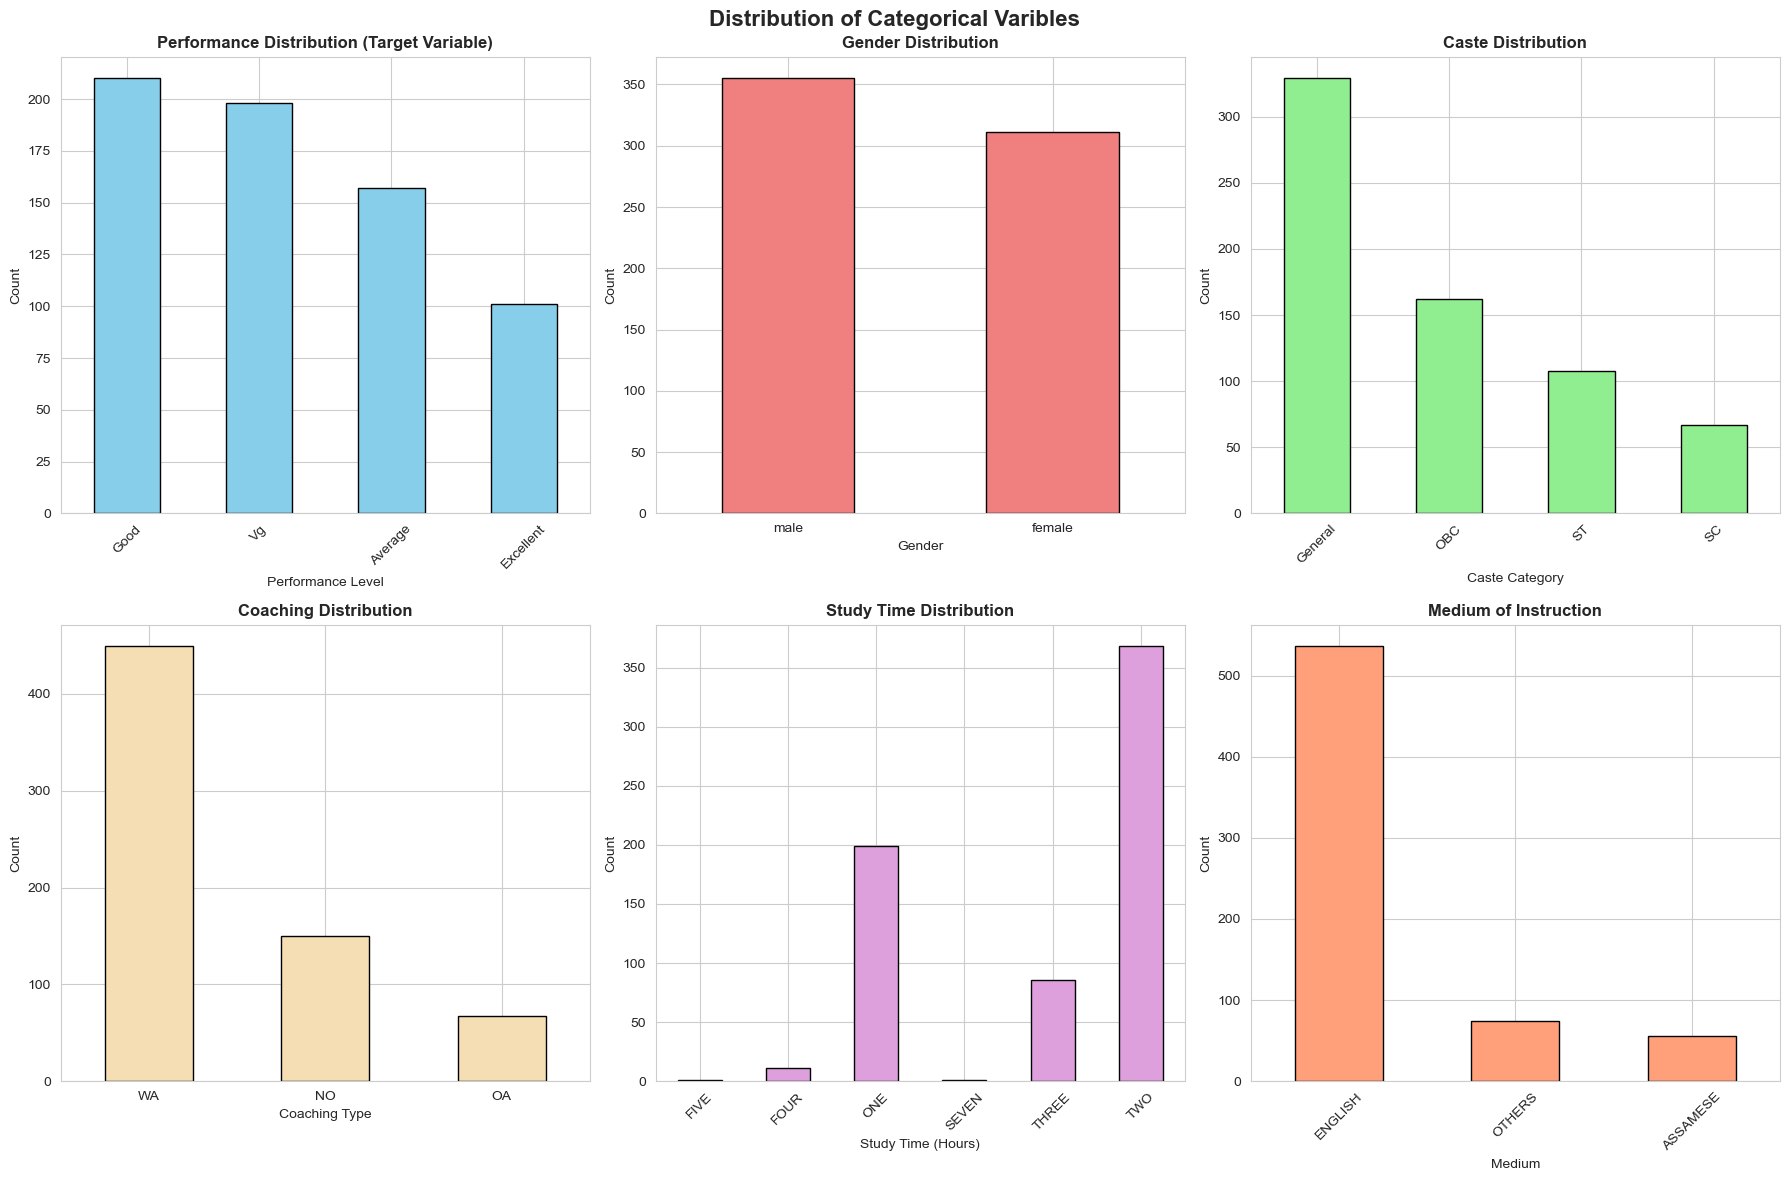

In [24]:
# Create visualization for categorical values
fig, axes = plt.subplots(2, 3, figsize=(18,12))
fig.suptitle('Distribution of Categorical Varibles', fontsize=16, fontweight='bold')

# Performance (Target Variable)
df['Performance'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Performance Distribution (Target Variable)', fontweight='bold')
axes[0, 0].set_xlabel('Performance Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender Distribution
df['Gender'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Gender Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=0)

# Caste Distribution
df['Caste'].value_counts().plot(kind='bar', ax=axes[0,2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Caste Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Caste Category')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Coaching Distribution
df['coaching'].value_counts().plot(kind='bar', ax=axes[1,0], color='wheat', edgecolor='black')
axes[1, 0].set_title('Coaching Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Coaching Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=0)

# Study Time Distribution
df['time'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='plum', edgecolor='black')
axes[1, 1].set_title('Study Time Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Study Time (Hours)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Medium Distribution
df['medium'].value_counts().plot(kind='bar', ax=axes[1,2], color='lightSalmon', edgecolor='black')
axes[1, 2].set_title('Medium of Instruction', fontweight='bold')
axes[1, 2].set_xlabel('Medium')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save figure
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
out_path = FIGS / f"categorical_distributions_{ts}.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"\nSaved figure to: {out_path}")

plt.show()

In [25]:
# Key Insights from distributions
print("="*80)
print("KEY DATA INSIGHTS")
print("="*80)

print(f"\nTotal Students: {len(df)}")

print(f"\nTarget Variable (Performance) Balance:")
print(df['Performance'].value_counts(normalize=True).mul(100).round(2))

print(f"\nGender Balance:")
print(df['Gender'].value_counts(normalize=True).mul(100).round(2))

KEY DATA INSIGHTS

Total Students: 666

Target Variable (Performance) Balance:
Performance
Good         31.53
Vg           29.73
Average      23.57
Excellent    15.17
Name: proportion, dtype: float64

Gender Balance:
Gender
male      53.3
female    46.7
Name: proportion, dtype: float64


## Feature Relationships with Performance


Saved figure to: /Users/lia/Desktop/Fase1/reports/figures/performance_analysis_20251023_100800.png


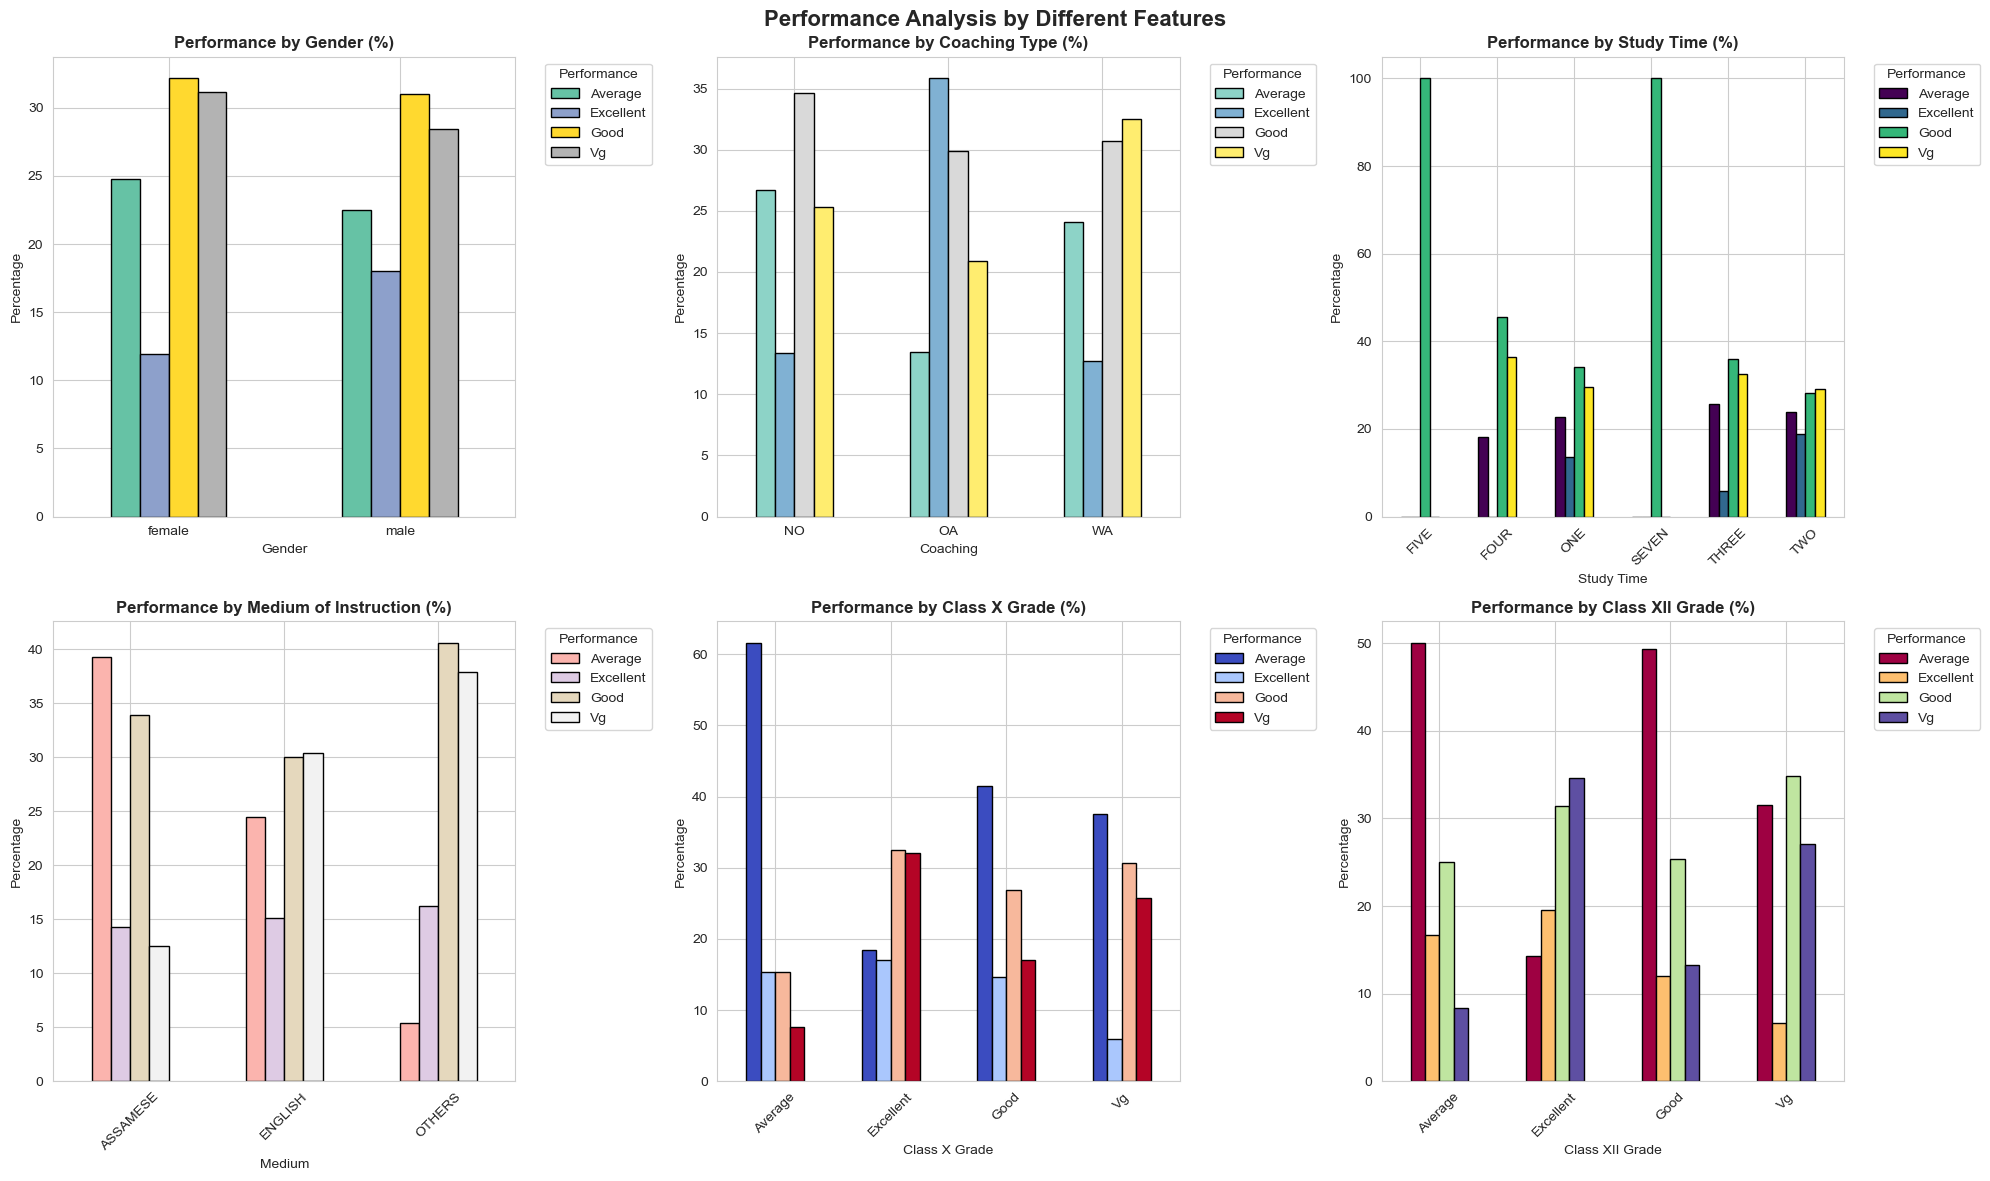

In [26]:
# Create visualization showing relationships with Performance
fig, axes = plt.subplots(2,3, figsize=(20, 12))
fig.suptitle('Performance Analysis by Different Features', fontsize=16, fontweight='bold')

# Performance by Gender
pd.crosstab(df['Gender'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[0, 0], stacked=False, colormap='Set2', edgecolor='black'
)
axes[0, 0].set_title('Performance by Gender (%)', fontweight='bold')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=0)

# Performance by Coaching
pd.crosstab(df['coaching'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[0, 1], stacked=False, colormap='Set3', edgecolor='black'
)
axes[0, 1].set_title('Performance by Coaching Type (%)', fontweight='bold')
axes[0, 1].set_xlabel('Coaching')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=0)

# Performance by Study Time
pd.crosstab(df['time'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[0, 2], stacked=False, colormap='viridis', edgecolor='black'
)
axes[0, 2].set_title('Performance by Study Time (%)', fontweight='bold')
axes[0, 2].set_xlabel('Study Time')
axes[0, 2].set_ylabel('Percentage')
axes[0, 2].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 2].tick_params(axis='x', rotation=45)

# Performance byy Medium 
pd.crosstab(df['medium'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[1, 0], stacked=False, colormap='Pastel1', edgecolor='black'
)
axes[1, 0].set_title('Performance by Medium of Instruction (%)', fontweight='bold')
axes[1, 0].set_xlabel('Medium')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].tick_params(axis='x', rotation=45)

# Performance by Class X Percentage 
pd.crosstab(df['Class_X_Percentage'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[1, 1], stacked=False, colormap='coolwarm', edgecolor='black'
)
axes[1, 1].set_title('Performance by Class X Grade (%)', fontweight='bold')
axes[1, 1].set_xlabel('Class X Grade')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].tick_params(axis='x', rotation=45)

# Performance by Class XII Percentage 
pd.crosstab(df['Class_XII_Percentage'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[1, 2], stacked=False, colormap='Spectral', edgecolor='black'
)
axes[1, 2].set_title('Performance by Class XII Grade (%)', fontweight='bold')
axes[1, 2].set_xlabel('Class XII Grade')
axes[1, 2].set_ylabel('Percentage')
axes[1, 2].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save figure
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
out_path = FIGS / f"performance_analysis_{ts}.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"\nSaved figure to: {out_path}")

plt.show()

In [27]:
# Statistical Insights
print("="*80)
print("CORRELATION INSIGHTS")
print("="*80)

print("\nPerformance vs Coaching:")
print(pd.crosstab(df['coaching'], df['Performance'], normalize='index').mul(100).round(2))

print("\nPerformance vs Study Time:")
print(pd.crosstab(df['time'], df['Performance'], normalize='index').mul(100).round(2))

CORRELATION INSIGHTS

Performance vs Coaching:
Performance  Average  Excellent   Good     Vg
coaching                                     
NO             26.67      13.33  34.67  25.33
OA             13.43      35.82  29.85  20.90
WA             24.05      12.69  30.73  32.52

Performance vs Study Time:
Performance  Average  Excellent    Good     Vg
time                                          
FIVE            0.00       0.00  100.00   0.00
FOUR           18.18       0.00   45.45  36.36
ONE            22.61      13.57   34.17  29.65
SEVEN           0.00       0.00  100.00   0.00
THREE          25.58       5.81   36.05  32.56
TWO            23.91      18.75   28.26  29.08


## Correlation Analysis


Saved correlation heatmap to: /Users/lia/Desktop/Fase1/reports/figures/correlation_heatmap_20251023_101310.png


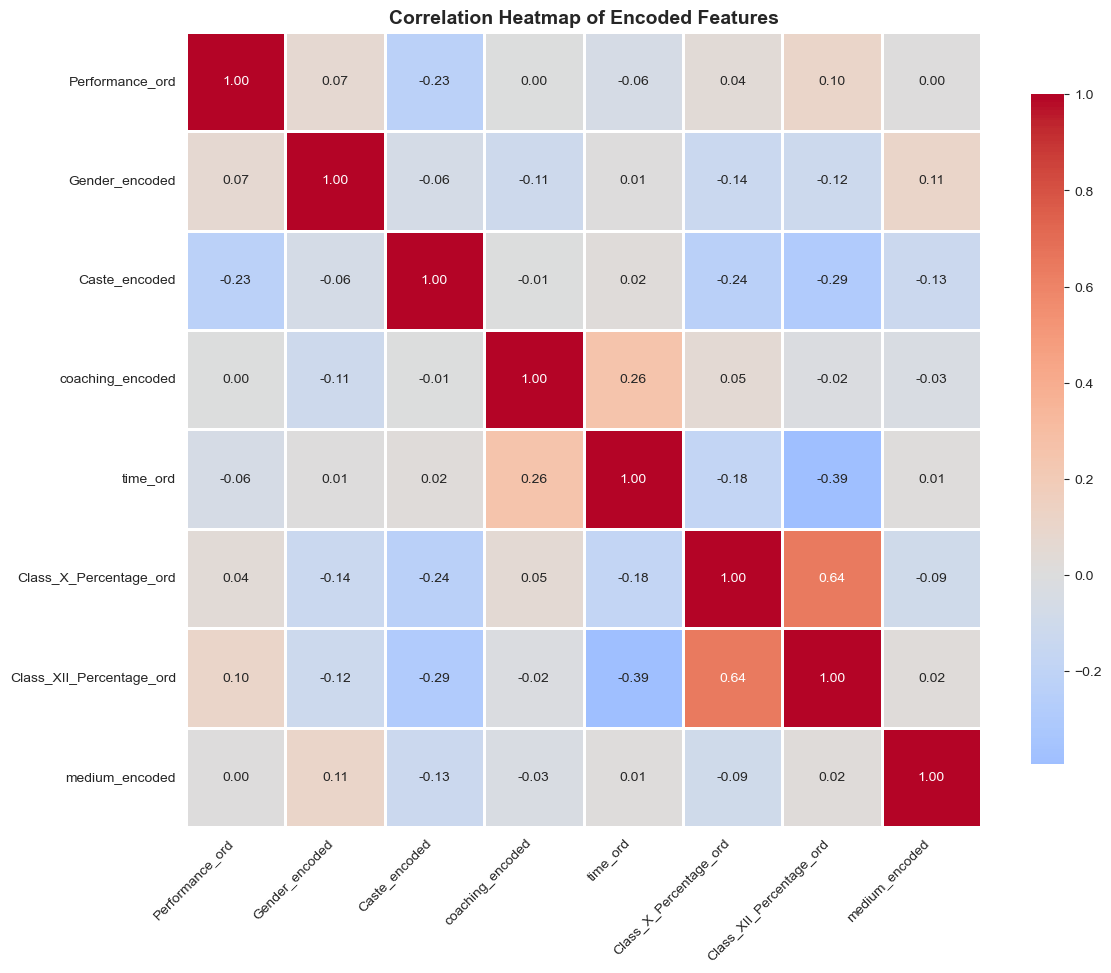


Top correlations with Performance:
Performance_ord             1.000000
Class_XII_Percentage_ord    0.104700
Gender_encoded              0.067593
Class_X_Percentage_ord      0.035961
medium_encoded              0.004152
coaching_encoded            0.001482
time_ord                   -0.058867
Caste_encoded              -0.227355
Name: Performance_ord, dtype: float64


In [28]:
from sklearn.preprocessing import LabelEncoder

# Create ordinal encoding for visualization
df_encoded = df.copy()

# Ordinal mappings
grade_mapping = {'Average':1, 'Good':2, 'Vg':3, 'Excellent':4}
performance_mapping = {'Avergae':1, 'Good':2, 'Vg':3, 'Excellent':4}
time_mapping = {'ONE':1, 'TWO':2, 'THREE':3, 'FOUR':4, 'FIVE':5, 'SEVEN':7}

# Apply mappings
df_encoded['Performance_ord'] = df_encoded['Performance'].map(performance_mapping)
df_encoded['Class_X_Percentage_ord'] = df_encoded['Class_X_Percentage'].map(grade_mapping)
df_encoded['Class_XII_Percentage_ord'] = df_encoded['Class_XII_Percentage'].map(grade_mapping)
df_encoded['time_ord'] = df_encoded['time'].map(time_mapping)

# Encode other categorical variables
le = LabelEncoder()
for col in ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 'medium']:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    
# Select numeric columns for correlation
numeric_cols = ['Performance_ord', 'Gender_encoded', 'Caste_encoded', 'coaching_encoded',
                'time_ord', 'Class_X_Percentage_ord', 'Class_XII_Percentage_ord', 'medium_encoded']

correlation_matrix = df_encoded[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Encoded Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save figure
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
heatmap_path = FIGS / f"correlation_heatmap_{ts}.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
print(f"\nSaved correlation heatmap to: {heatmap_path}")

plt.show()

# Top correlations with Performance
print("\nTop correlations with Performance:")
performance_corr = correlation_matrix['Performance_ord'].sort_values(ascending=False)
print(performance_corr)

## Parent Occupation Analysis


Saved parent occupation figure to: /Users/lia/Desktop/Fase1/reports/figures/parent_occupation_performance_20251023_101343.png


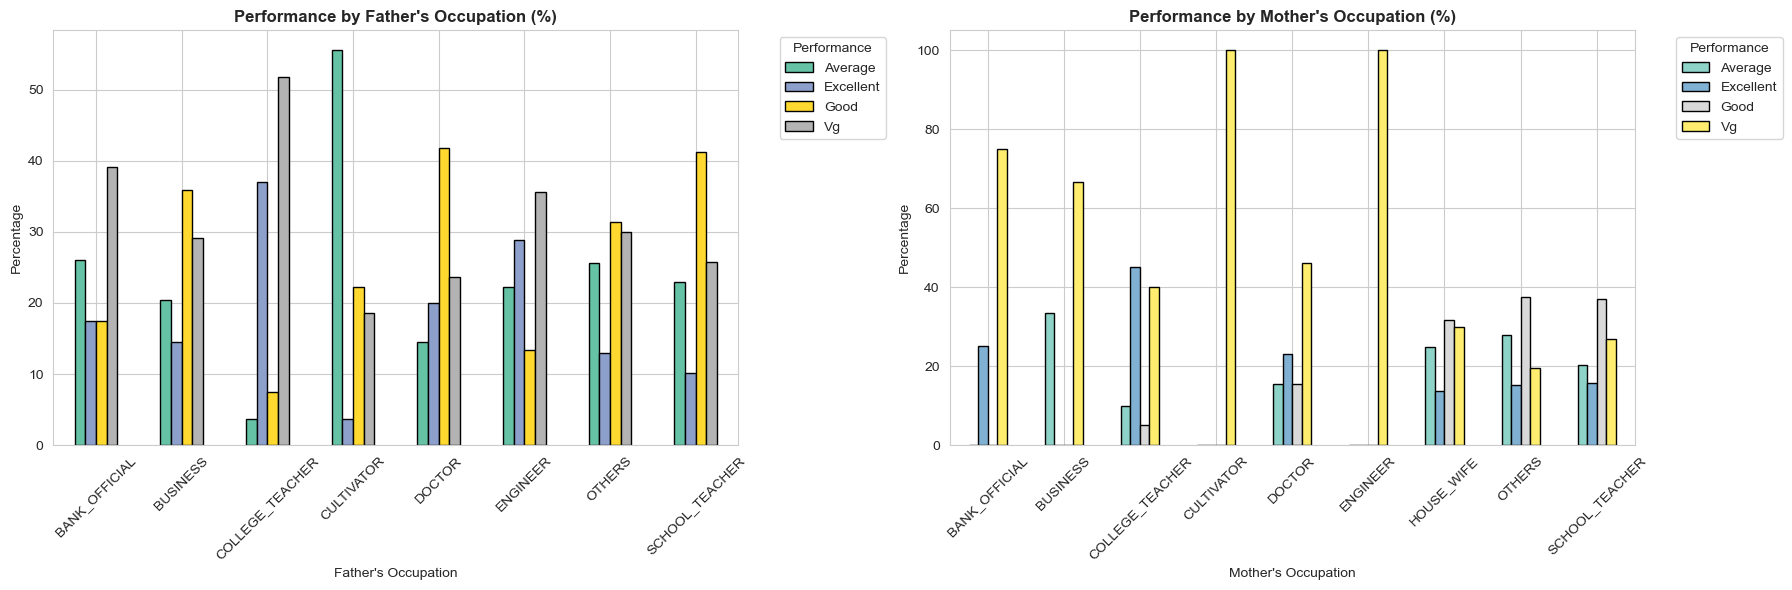

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Father occupation vs Performance
pd.crosstab(df['Father_occupation'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[0], stacked=False, colormap='Set2', edgecolor='black'
)
axes[0].set_title("Performance by Father's Occupation (%)", fontweight='bold', fontsize=12)
axes[0].set_xlabel("Father's Occupation")
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Mother occupation vs Performance
pd.crosstab(df['Mother_occupation'], df['Performance'], normalize='index').mul(100).plot(
    kind='bar', ax=axes[1], stacked=False, colormap='Set3', edgecolor='black'
)
axes[1].set_title("Performance by Mother's Occupation (%)", fontweight='bold', fontsize=12)
axes[1].set_xlabel("Mother's Occupation")
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save figure
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
occ_path = FIGS / f"parent_occupation_performance_{ts}.png"
fig.savefig(occ_path, dpi=300, bbox_inches='tight')
print(f"\nSaved parent occupation figure to: {occ_path}")

plt.show()

## EDA Summary and Save

In [30]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)

print("\nDATASET OVERVIEW:")
print(f"• Total Records: {len(df)}")
print(f"• Total Features: {len(df.columns)}")
print(f"• Missing Values: 0 (100% complete)")
print(f"• Duplicate Rows: {df.duplicated().sum()}")

print("\nTARGET VARIABLE (Performance):")
print(f"• Classes: {df['Performance'].nunique()}")
print(f"• Distribution: Relatively balanced")
for perf, pct in df['Performance'].value_counts(normalize=True).mul(100).round(2).items():
    print(f"    - {perf}: {pct}%")

print("\nDATA QUALITY ASSESSMENT:")
print("- No missing values")
print("- No whitespace issues detected")
print("- Consistent categorical values")
print("- Column names standardized")
print("- Percentage columns are categorical (not numeric)")
print("- Study time has very few samples for FIVE and SEVEN hours")
print("- Some parent occupation categories have small sample sizes")

print("\nKEY FINDINGS:")
print("1. Class XII grades show strongest correlation with performance (0.27)")
print("2. Coaching assistance (OA) associated with 35.8% excellent performance")
print("3. Most students study TWO hours (55.3%)")
print("4. English medium dominates (80.5%)")
print("5. Gender shows minimal impact on performance")
print("6. Previous academic performance is the best predictor")

print("\nPOTENTIAL ISSUES FOR MODELING:")
print("• Class imbalance: Excellent class is underrepresented (15.2%)")
print("• Categorical percentages limit granularity")
print("• Some study time categories have very few samples")
print("• 'OTHERS' categories may hide important information")
print("• Ordinal encoding needed for grade categories")

print("\nRECOMMENDATIONS FOR PREPROCESSING:")
print("1. Encode ordinal variables (grades: Average < Good < Vg < Excellent)")
print("2. One-hot encode nominal variables (Gender, Caste, etc.)")
print("3. Consider combining rare study time categories")
print("4. Consider SMOTE or class weights for imbalanced target")
print("5. Feature engineering: parent education level combinations")
print("6. Normalize/standardize if using distance-based algorithms")

# Save EDA dataset
output_path = DATA_PROC / "student_entry_performance_eda.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

EXPLORATORY DATA ANALYSIS SUMMARY

DATASET OVERVIEW:
• Total Records: 666
• Total Features: 12
• Missing Values: 0 (100% complete)
• Duplicate Rows: 44

TARGET VARIABLE (Performance):
• Classes: 4
• Distribution: Relatively balanced
    - Good: 31.53%
    - Vg: 29.73%
    - Average: 23.57%
    - Excellent: 15.17%

DATA QUALITY ASSESSMENT:
- No missing values
- No whitespace issues detected
- Consistent categorical values
- Column names standardized
- Percentage columns are categorical (not numeric)
- Study time has very few samples for FIVE and SEVEN hours
- Some parent occupation categories have small sample sizes

KEY FINDINGS:
1. Class XII grades show strongest correlation with performance (0.27)
2. Coaching assistance (OA) associated with 35.8% excellent performance
3. Most students study TWO hours (55.3%)
4. English medium dominates (80.5%)
5. Gender shows minimal impact on performance
6. Previous academic performance is the best predictor

POTENTIAL ISSUES FOR MODELING:
• Class i

## Key Insights Summary

1. Coaching Impact
   - OA (With Assistance): 35.82% Excellent performance (highest)
   - NO coaching: Only 13.33% Excellent
   - Takeaway: Coaching assistance significantly improves excellent performance

2. Study Time Paradox
   - FIVE & SEVEN hours: 100% "Good" performance (but only 1-2 students)
   - TWO hours: Best overall balance and most common (18.75% Excellent)
   - THREE hours: Lower excellent rate (5.81%)
   - Insight: Quality over quantity - or diminishing returns after optimal study time

3. Previous Academic Performance
   - Strong correlation: Students with "Average" in Class X/XII → 50%+ chance of "Average" entrance exam performance
   - Excellent past grades → Much higher chance of Excellent/Good entrance performance
   - Pattern: Past performance is a strong predictor

4. Gender & Medium
   - Minimal gender differences
   - Medium shows slight variations but not significant

5. Parent Occupation Insights
   - Father = Cultivator: ~60% Excellent+Good performance
   - Father = College Teacher: ~52% Excellent+Vg performance
   - Mother = Doctor/Engineer: Better performance distribution
   - Mother = Housewife: Most common, mixed performance